In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from pandas.core.dtypes.common import classes
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/finaldataset', output="char_output_extended", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 5518 files [04:13, 21.80 files/s]


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf 
import keras
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from six.moves import cPickle as Pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [ ]:
IMG_WIDTH=299
IMG_HEIGHT=299
img_folder=r'/content/char_output_extended/train'

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/char_output_extended/train')

In [ ]:
IMG_WIDTH=299
IMG_HEIGHT=299
img_folder=r'/content/char_output_extended/test'

In [ ]:
def create_dataset(img_folder):
   
    img_data_test_array=[]
    class_name_test=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_test_array.append(image)
            class_name_test.append(dir1)
    return img_data_test_array, class_name_test
# extract the image array and class name
img_test_data, class_name_test =create_dataset(r'/content/char_output_extended/test')

In [ ]:
target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_dict_test

{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [ ]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
target_test_val=  [target_dict_test[class_name_test[i]] for i in range(len(class_name_test))]

In [ ]:
IMG_WIDTH=299
IMG_HEIGHT=299
img_folder=r'/content/char_output_extended/val'

In [ ]:
def create_dataset(img_folder):
   
    img_data_vali_array=[]
    class_name_vali=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_vali_array.append(image)
            class_name_vali.append(dir1)
    return img_data_vali_array, class_name_vali
# extract the image array and class name
img_vali_data, class_name_vali =create_dataset(r'/content/char_output_extended/val')

In [ ]:
target_dict_vali={k: v for v, k in enumerate(np.unique(class_name_vali))}
target_dict_vali

{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [ ]:
target_vali_val=  [target_dict_vali[class_name_vali[i]] for i in range(len(class_name_vali))]

In [ ]:
vali_data=np.array(img_vali_data, np.float32)
vali_labels=np.array(list(map(int,target_vali_val)), np.float32)
vali_labels=to_categorical(vali_labels)
print(vali_labels.shape)
print(vali_data.shape)

(539, 25)
(539, 299, 299)


In [ ]:
import numpy as np

vali_data = np.expand_dims(vali_data[..., 0], axis=-1)
print(vali_labels.shape)
print(vali_data.shape)

(539, 25)
(539, 299, 1)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import optimizers

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (299, 299)
batch_size = 32
epochs = 15
learning_rate = 0.0001

# Initialize the ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Create the top layers for the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = optimizers.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model
model.save('trained_model.h5')


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
87910968/87910968 [==============================] - 3s 0us/step


Epoch 1/15
142/142 [==============================] - 126s 558ms/step - loss: 2.1514 - accuracy: 0.3614 - val_loss: 43.7498 - val_accuracy: 0.0661
Epoch 2/15
142/142 [==============================] - 69s 485ms/step - loss: 0.8452 - accuracy: 0.7404 - val_loss: 7.4735 - val_accuracy: 0.4656
Epoch 3/15
142/142 [==============================] - 68s 478ms/step - loss: 0.4814 - accuracy: 0.8548 - val_loss: 2.6882 - val_accuracy: 0.6899
Epoch 4/15
142/142 [==============================] - 68s 479ms/step - loss: 0.3313 - accuracy: 0.9002 - val_loss: 1.0232 - val_accuracy: 0.7927
Epoch 5/15
142/142 [==============================] - 69s 484ms/step - loss: 0.2611 - accuracy: 0.9237 - val_loss: 2.1270 - val_accuracy: 0.7346
Epoch 6/15
142/142 [==============================] - 69s 483ms/step - loss: 0.2279 - accuracy: 0.9363 - val_loss: 0.8731 - val_accuracy: 0.8293
Epoch 7/15
142/142 [==============================] - 68s 478ms/step - loss: 0.1865 - accuracy: 0.9462 - val_loss: 0.7086 - val_

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the saved InceptionV3 model
saved_model_path = 'trained_model.h5'
model = load_model(saved_model_path)

# Load and preprocess the image
image_path = '/content/char_output_extended/test/anna/382.jpg'  # Replace with the path to your image
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Make the prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 1s/step
Predicted Class: 4


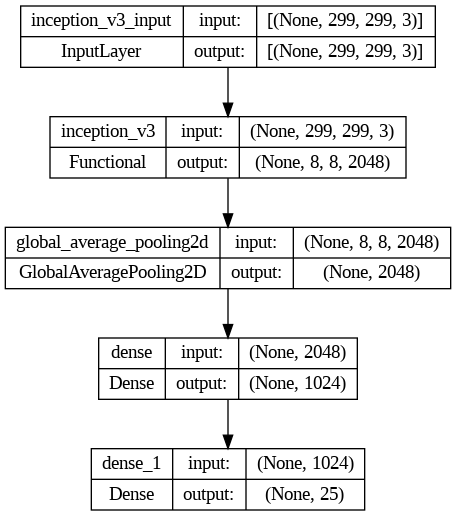

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


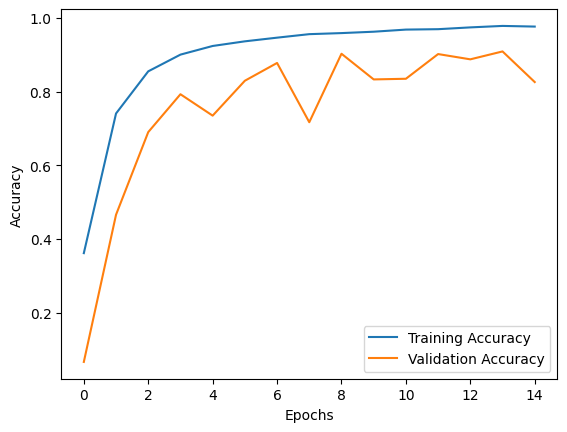

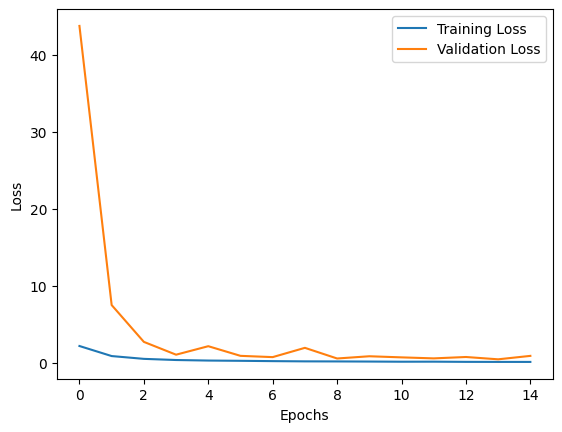

In [ ]:
import matplotlib.pyplot as plt



# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
